# Analyzing Open University Learning Analytics Dataset

#### Reference: https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset#

#### Complete data and data description: https://analyse.kmi.open.ac.uk/open_dataset

Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)----AAA, BBB, CCC, DDD, EEE, FFF, GGG. Presentations of courses start in February and October - they are marked by 'B' and 'J' respectively (2013B, 2013J, 2014B, 2014J). The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files
<ol>
    <li>assessements.csv (206)</li>
    <li>courses.csv (22)</li>
    <li>studentAssessment.csv (173912)</li>
    <li>studentInfo.csv (32593)</li>
    <li>studentRegistration.csv (32593)</li>
    <li>studentVle.csv (10655280)</li>
    <li>vle.csv (6364)</li>
</ol>

In [65]:
!ls

Analyzing_Open_University_Learning_Analytics_Dataset.ipynb
Dataset
README.md


In [66]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
%matplotlib inline

In [67]:
student_info = pd.read_csv('Dataset/studentInfo.csv')
student_assessment = pd.read_csv('Dataset/studentAssessment.csv')
student_registration = pd.read_csv('Dataset/studentRegistration.csv')
student_vle = pd.read_csv('Dataset/studentVle.csv')
assessments = pd.read_csv('Dataset/assessments.csv')
courses = pd.read_csv('Dataset/courses.csv')
vle = pd.read_csv('Dataset/vle.csv')

In [68]:
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


In [69]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [70]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [71]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [72]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [73]:
assessments.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [74]:
courses.head()


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [75]:
vle.head()


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [76]:
student_info.shape

(32593, 12)

In [77]:
student_assessment.shape

(173912, 5)

In [78]:
student_registration.shape

(32593, 5)

In [79]:
student_vle.shape

(10655280, 6)

In [80]:
assessments.shape

(206, 6)

In [81]:
courses.shape

(22, 3)

In [82]:
vle.shape

(6364, 6)

## EDA 

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


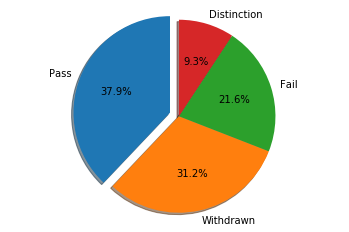

In [107]:
print(student_info['final_result'].value_counts())
labels = student_info['final_result'].unique()
sizes = student_info['final_result'].value_counts()
explode = (0.1, 0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Minimum_Credits :  30
Maximum_Credits:  655
Zero credits :  0


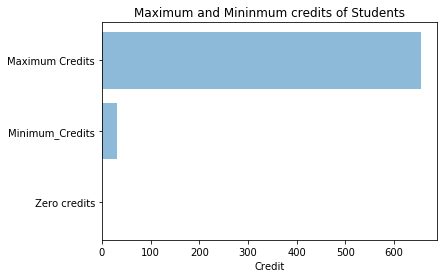

In [85]:
print('Minimum_Credits : ',str(student_info['studied_credits'].min()))
print('Maximum_Credits: ',str(student_info['studied_credits'].max()))
print('Zero credits : ',student_info[student_info['studied_credits'] == 0].size)

objects = ('Zero credits', 'Minimum_Credits', 'Maximum Credits' )
y_pos = np.arange(len(objects))
performance = {(student_info['studied_credits'].min()), (student_info['studied_credits'].max()), (student_info[student_info['studied_credits'] == 0].size)}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Maximum and Mininmum credits of Students')
plt.show()

Minimum_Credits(PASS) 30
Maximum_Credits(PASS) 630


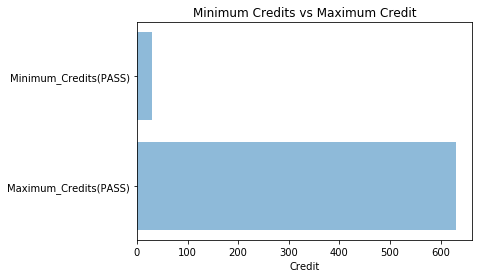

In [86]:
#get student past credits for passing students
passing_student_info = student_info[student_info['final_result']=='Pass']
print('Minimum_Credits(PASS)',passing_student_info['studied_credits'].min())
print('Maximum_Credits(PASS)',passing_student_info['studied_credits'].max())

objects = ('Maximum_Credits(PASS)', 'Minimum_Credits(PASS)')
y_pos = np.arange(len(objects))
performance = {(passing_student_info['studied_credits'].min()), (passing_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum Credits vs Maximum Credit')
plt.show()



Minimum_Credits(Withdrawn) 30
Maximum_Credits(Withdrawn) 655


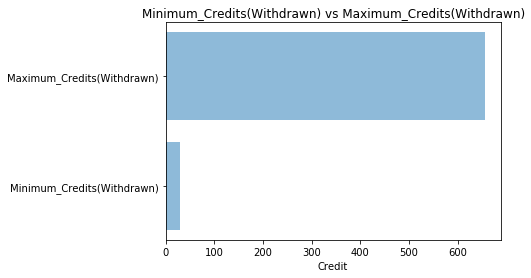

In [87]:
#get student past credits for withdrawing students
withdrawn_student_info = student_info[student_info['final_result']=='Withdrawn']
#print(withdrawn_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].min())
print('Maximum_Credits(Withdrawn)',withdrawn_student_info['studied_credits'].max())

objects = ('Minimum_Credits(Withdrawn)', 'Maximum_Credits(Withdrawn)')
y_pos = np.arange(len(objects))
performance = {(withdrawn_student_info['studied_credits'].min()), (withdrawn_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum_Credits(Withdrawn) vs Maximum_Credits(Withdrawn)')
plt.show()




Minimum_Credits(Fail) 30
Maximum_Credits(Fail) 360


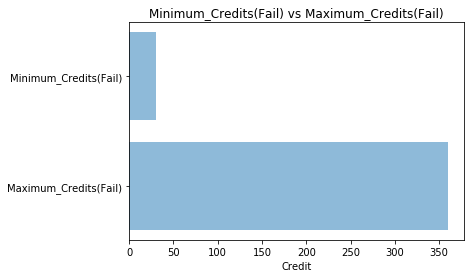

In [88]:
#get student past credits for Failing students
fail_student_info = student_info[student_info['final_result']=='Fail']
#print(fail_student_info['studied_credits'].value_counts())
print('Minimum_Credits(Fail)',fail_student_info['studied_credits'].min())
print('Maximum_Credits(Fail)',fail_student_info['studied_credits'].max())

objects = ('Maximum_Credits(Fail)', 'Minimum_Credits(Fail)')
y_pos = np.arange(len(objects))
performance = {(fail_student_info['studied_credits'].min()), (fail_student_info['studied_credits'].max())}
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Credit')
plt.title('Minimum_Credits(Fail) vs Maximum_Credits(Fail)')
plt.show()

### Visualizing Student Info

<p>First we will determine the demographics scenario of the students. </p>

In [159]:
objects = ('Scotland', 
           'East Anglian Region', 
           'London Region', 
           'South Region',
           'North Western Region', 
           'West Midlands Region', 
           'South West Region', 
           'East Midlands Region', 
           'South East Region',
           'Wales', 
           'Yorkshire Region',
           'North Region',
           'Ireland' )
y_pos = np.arange(len(objects))
performance = student_info['region'].value_counts(sort=True).to_list()
performance
#plt.barh(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
#plt.xlabel('Number')
#plt.title('Geographic location based on student number')
#plt.show()

[3446, 3340, 3216, 3092, 2906, 2582, 2436, 2365, 2111, 2086, 2006, 1823, 1184]

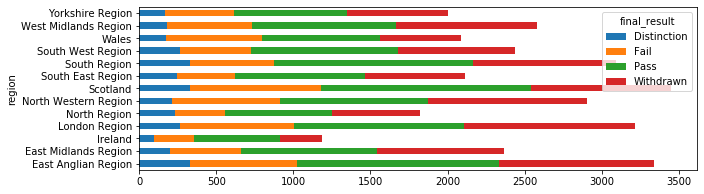

In [117]:
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True, figsize=(10,3));

We find failures in some regions than other regions. So we investigate more into those regional students.studentByRegion

In [179]:
student_info_fail = student_info[student_info["final_result"] =='Fail']

total_students_by_region = student_info.groupby(['region']).size().reset_index(name='Total Student').sort_values(by="Total Student",ascending=False)
failed_students_by_region = student_info_fail.groupby(['region']).size().reset_index(name='Total Failed').sort_values(by="Total Failed",ascending=False)
merged_total_and_failed_by_region = pd.merge(FailsStudentByRegion, TotalStudentByRegion, on='region')
merged_total_and_failed_by_region['Percentage'] = round(merged_total_and_failed_by_region['Total Failed'] / merged_total_and_failed_by_region['Total Student'] * 100,3)

regions_with_higher_failure_ratio = merged_total_and_failed_by_region[merged_total_and_failed_by_region['Percentage'] >20]


,region,Total Failed,Total Student,Percentage
0,Scotland,852,3446,24.724
1,London Region,744,3216,23.134
2,North Western Region,704,2906,24.226
3,East Anglian Region,698,3340,20.898
4,Wales,620,2086,29.722
5,West Midlands Region,551,2582,21.340
9,Yorkshire Region,449,2006,22.383
12,Ireland,261,1184,22.044


Male-Female comparison by Region  with higher failure rate  

In [ ]:
regions_with_higher_failure_ratio
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True, figsize=(10,3));

In [127]:
pd_pass=student_info["final_result"] =="Pass"
pd_pass.value_counts()

False    20232
True     12361
Name: final_result, dtype: int64

In [126]:
pd_Withdrawn=student_info["final_result"] =="Withdrawn"
pd_Withdrawn.value_counts()

False    22437
True     10156
Name: final_result, dtype: int64

In [118]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Contruction of date, month (Sep Oct Nov Dec Jan Feb Mar Apr May June)

In [96]:
def date_revision(date):
    if date <= -1:
        return 'Sep'
    elif date <= 31:
        return 'Oct'
    elif date <= 61:
        return 'Nov'
    elif date <= 92:
        return 'Dec'
    elif date <= 123:
        return 'Jan'
    elif date <= 151:
        return 'Feb'
    elif date <= 179:
        return 'Mar'
    elif date <= 210:
        return 'Apr'
    elif date <= 240:
        return 'May'
    else:
        return 'Jun'
    

In [97]:
def date_number(date):
    if date == 'Sep':
        return 1
    elif date == 'Oct':
        return 2
    elif date == 'Nov':
        return 3
    elif date == 'Dec':
        return 4
    elif date == 'Jan':
        return 5
    elif date == 'Feb':
        return 6
    elif date == 'Mar':
        return 7
    elif date == 'Apr':
        return 8
    elif date == 'May':
        return 9
    else:
        return 10

In [98]:
studentVle_merge_df['revised_date'] = studentVle_merge_df['date'].apply(date_revision)

In [99]:
studentVle_merge_df['date_no'] = studentVle_merge_df['revised_date'].apply(date_number)
studentVle_merge_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,distinction,revised_date,date_no
0,BBB,2013B,333129,542864,-9,3,homepage,Non-Distinction,Sep,1
1,BBB,2013B,333129,542808,-9,4,forumng,Non-Distinction,Sep,1
2,BBB,2013B,333129,542795,-9,1,forumng,Non-Distinction,Sep,1
3,BBB,2013B,333129,542808,-9,6,forumng,Non-Distinction,Sep,1
4,BBB,2013B,333129,542795,-9,1,forumng,Non-Distinction,Sep,1


In [100]:
distinction = studentVle_merge_df['distinction'] == 'Distinction'
studentVle_merge_B_df = pd.DataFrame(studentVle_merge_df[distinction].groupby(['revised_date','date_no'])['sum_click'].sum())
studentVle_merge_B_df.reset_index(inplace = True)

nodistinction = studentVle_merge_df['distinction'] == 'Non-Distinction'
studentVle_merge_NA_df = pd.DataFrame(studentVle_merge_df[nodistinction].groupby(['revised_date','date_no'])['sum_click'].sum())
studentVle_merge_NA_df.reset_index(inplace = True)
studentVle_merge_NA_df['sum_click'] = round(studentVle_merge_NA_df['sum_click'] / 16)
studentVle_merge_NA_df

,revised_date,date_no,sum_click
0,Apr,8,23460.0
1,Dec,4,24447.0
2,Feb,6,25186.0
3,Jan,5,32138.0
4,Jun,10,2641.0
5,Mar,7,21432.0
6,May,9,20268.0
7,Nov,3,42612.0
8,Oct,2,58796.0
9,Sep,1,13342.0


In [101]:
studentVle_merge_B_df = studentVle_merge_B_df.sort_values('date_no')
studentVle_merge_NA_df = studentVle_merge_NA_df.sort_values('date_no')

In [102]:
print(studentVle_merge_B_df)
print(studentVle_merge_NA_df)

  revised_date  date_no  sum_click
9          Sep        1      43004
8          Oct        2     180746
7          Nov        3     140713
1          Dec        4     102170
3          Jan        5     128424
2          Feb        6     102186
5          Mar        7      93236
0          Apr        8     104762
6          May        9      99399
4          Jun       10      10408
  revised_date  date_no  sum_click
9          Sep        1    13342.0
8          Oct        2    58796.0
7          Nov        3    42612.0
1          Dec        4    24447.0
3          Jan        5    32138.0
2          Feb        6    25186.0
5          Mar        7    21432.0
0          Apr        8    23460.0
6          May        9    20268.0
4          Jun       10     2641.0


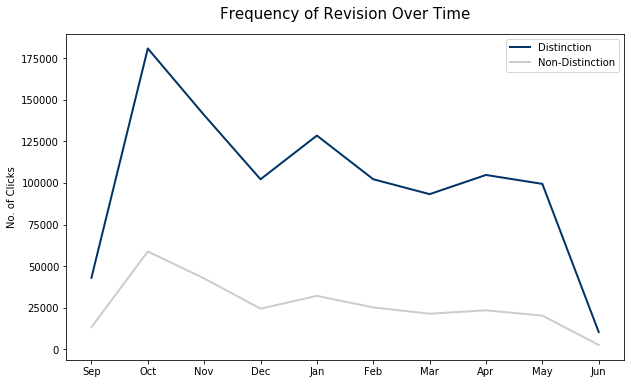

In [103]:
fig= plt.figure(figsize=(10,6)) 
ax1 = plt.plot( 'revised_date', 'sum_click', data=studentVle_merge_B_df, marker='', color='#003366', linewidth=2)
ax2 = plt.plot( 'revised_date', 'sum_click', data=studentVle_merge_NA_df, marker='', color='#cccccc', linewidth=2)
plt.legend(labels =['Distinction','Non-Distinction'])
plt.ylabel('No. of Clicks', fontsize=10)
plt.title('Frequency of Revision Over Time', loc='center',pad=15, fontsize=15);